# Application 1: Autoencoder 


In [1]:
import numpy as np
from nn import NeuralNetwork
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 1. Generate instance of NeuralNetwork class for 64x16x64 autoencoder 

In [2]:
# 64x16x64 autoencorder architecture 
arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
       {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]

# instantiate model with arch and written params
AE= NeuralNetwork(arch, lr=5, seed=40, batch_size=2,
                  epochs=5, loss_function = 'mse')



## 2. Read in digits dataset from sklearn

In [3]:
mnist = load_digits()
data = mnist['data']
tars = mnist['target']

## 3. Split data  into training and test sets

In [4]:
# split test and train datasets 80/20 split
X_train, X_val, y_train, y_val = train_test_split(data, tars,
                                                 test_size=0.2,
                                                 random_state=0)



## 4. Train Autoencoder on the train split 

In [7]:
train_loss, val_loss = AE.fit(X_train, X_train, X_val, X_val)

## 5. Plot the loss

There's obviously something wrong with my network...it just returns the original data it seems. I'm not sure what it's doing.

In [13]:
def plot_loss(n_epochs, train_loss, val_loss, title, y_axis_label):
    fig, ax =plt.subplots()
    epochs = [x/2 for x in range(n_epochs)]
    ax.plot(epochs, val_loss, label="val loss")
    ax.plot(epochs, train_loss, label="train loss")
    #ax.set_ylim(55,65)
    ax.set_xlabel("Epoch")
    ax.set_ylabel(y_axis_label)
    ax.set_title(title)
    plt.show()

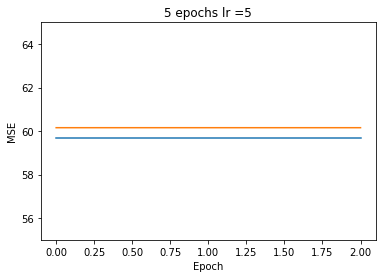

In [10]:
title='5 epochs lr =5'

plot_loss(5, train_loss, val_loss, title)

## 6. Hyperparameter tuning
I am tuning the parameters:
- number of epochs
- learning rate
- loss function

I want to look at the plots of the loss to decide what the ideal hyperparameter combination is. 

The behavior is weird, it seems like the problem hits a minimum loss of ~50, i'm not sure if this is diagnostic of dataset or there is something wrong with my network. However, given these plots, I wouldn't choose a high number of epochs, since we hit the minimum reconstruction error quickly. Even with a large learning rate of 10, we are not leaving that minimum loss, but I would stil choose a larger learning rate for this problem. For the loss function, it looks like we hit similar values for reconstruction error, but the BCE loss function hits it quicker, so I would choose that one. In summary, I would choose:
- low number of epochs ~ 50
- high learning rate ~ 10
- BCE loss function 

In [16]:
epoch_vals=[5,10,50,100,500]
lrs=[0.001, 0.01, 0.1, 10]


In [18]:
all_combos=[[(x,y) for x in epoch_vals]for y in lrs]

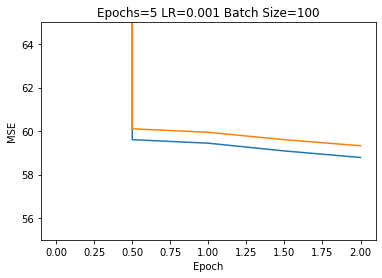

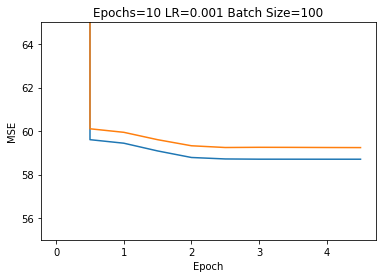

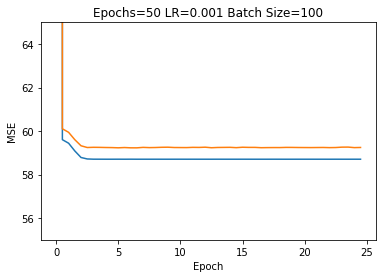

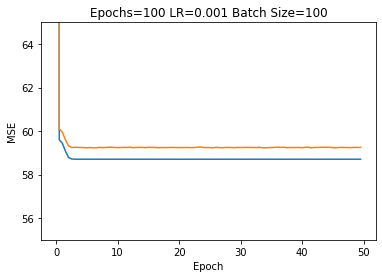

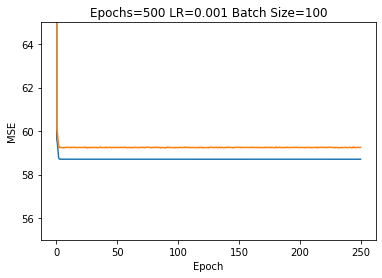

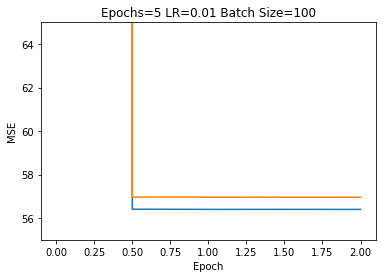

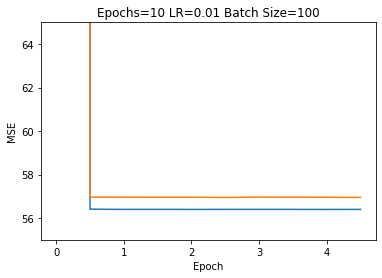

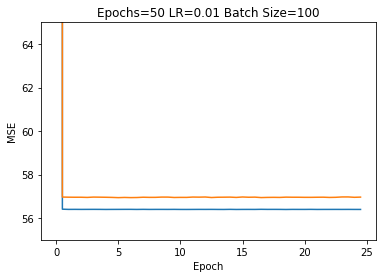

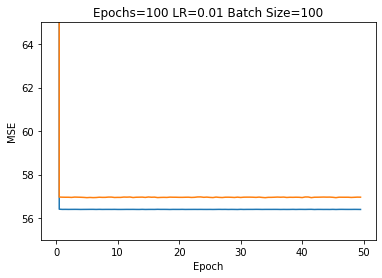

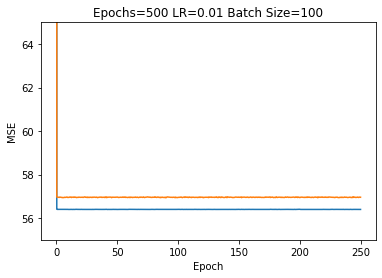

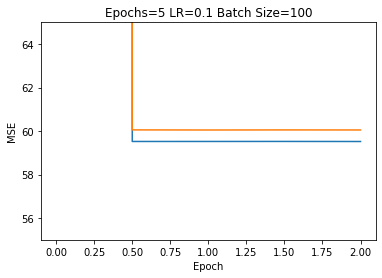

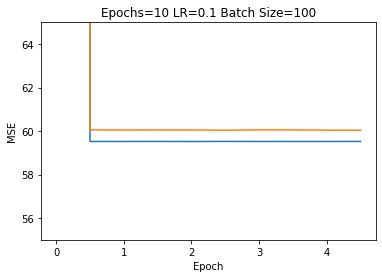

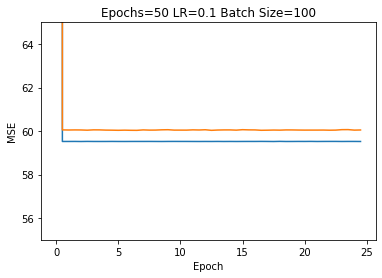

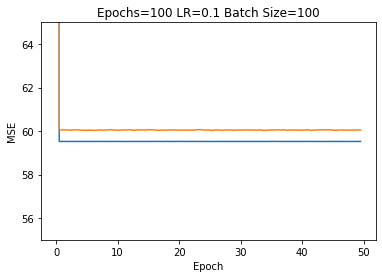

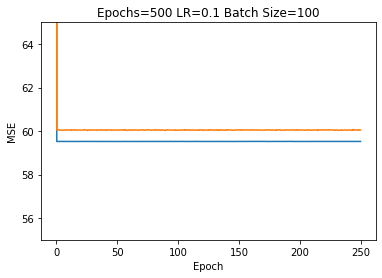

In [16]:
for x in all_combos:
    for y in x:
        # define hyperparameters
        epochs_=y[0]
        lr_=y[1]
        
        # define network
        AE= NeuralNetwork(arch, lr=lr_, seed=40, batch_size=100,
                  epochs=epochs_, loss_function = 'mse')
        
        # train 
        train_loss, val_loss = AE.fit(X_train, X_train, X_val, X_val)
        
        # plot
        title="Epochs={} LR={} Batch Size={}".format(epochs_, lr_, 100)
        plot_loss(epochs_, train_loss, val_loss, title)

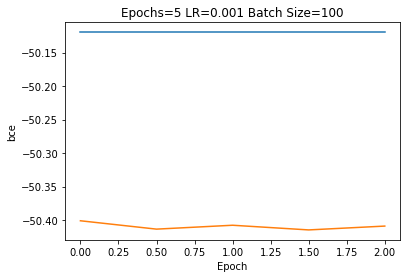

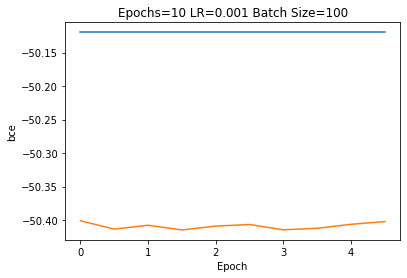

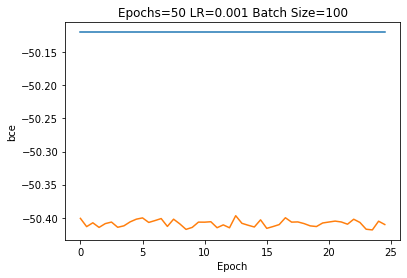

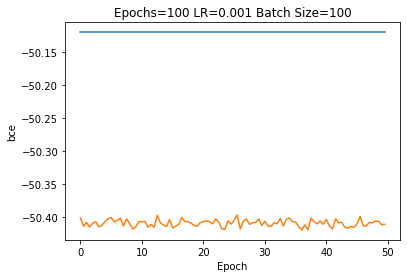

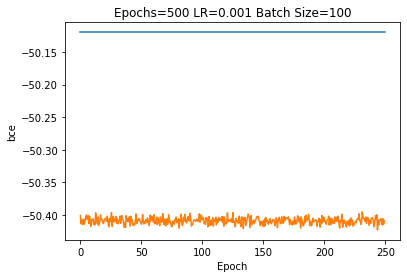

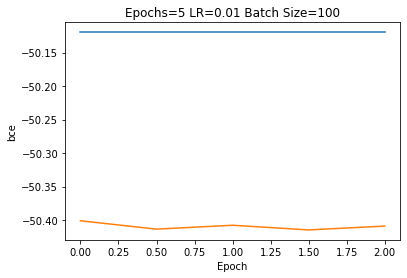

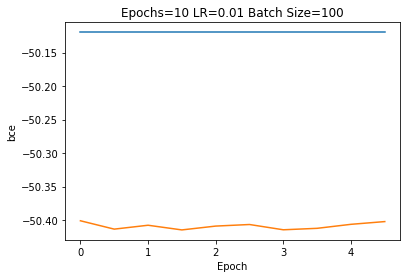

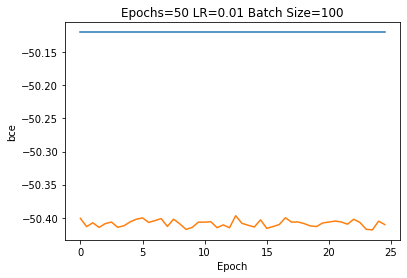

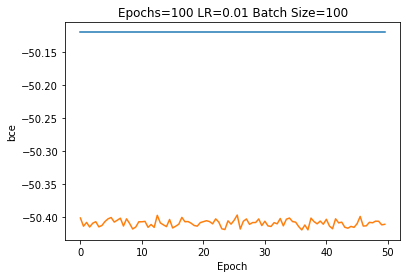

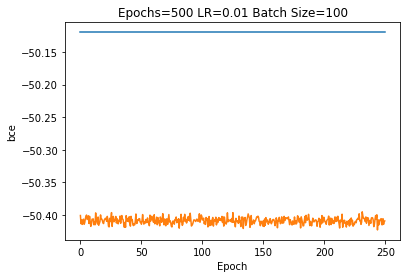

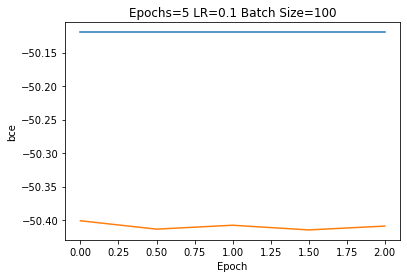

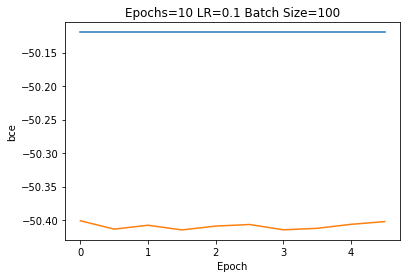

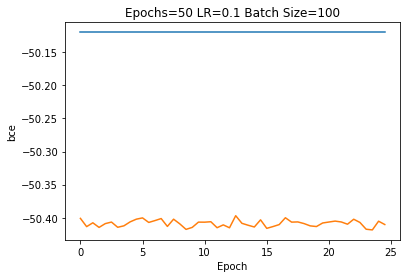

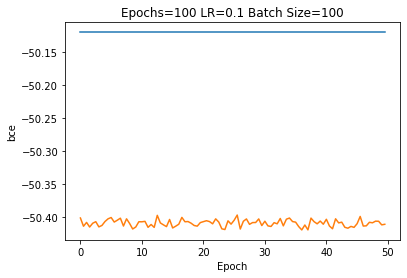

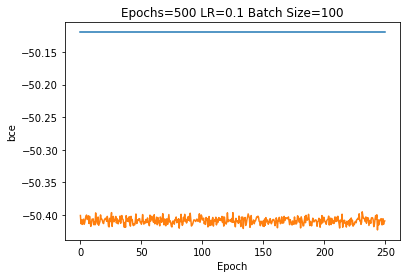

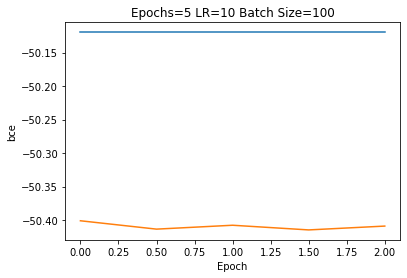

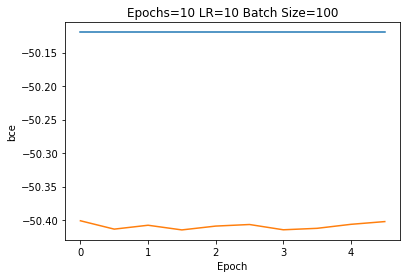

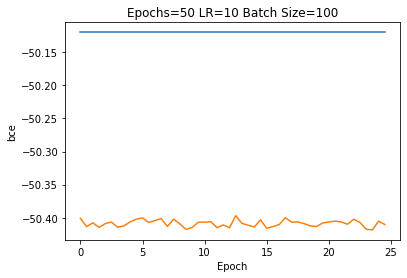

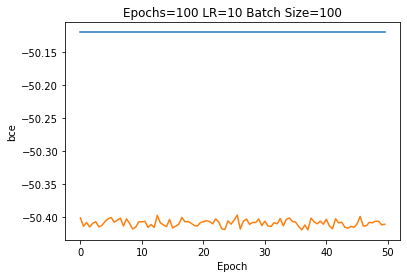

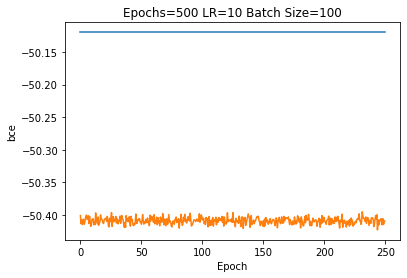

In [19]:
for x in all_combos:
    for y in x:
        # define hyperparameters
        epochs_=y[0]
        lr_=y[1]
        
        # define network
        AE= NeuralNetwork(arch, lr=lr_, seed=40, batch_size=100,
                  epochs=epochs_, loss_function = 'bce')
        
        # train 
        train_loss, val_loss = AE.fit(X_train, X_train, X_val, X_val)
        
        # plot
        title="Epochs={} LR={} Batch Size={}".format(epochs_, lr_, 100)
        plot_loss(epochs_, train_loss, val_loss, title, 'bce')

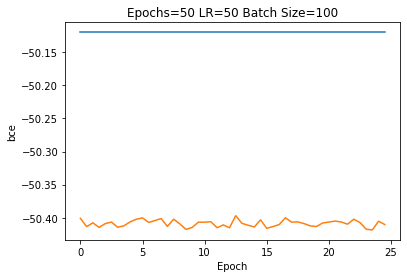

In [20]:
epochs_=50
lr_=50
AE= NeuralNetwork(arch, lr=lr_, seed=40, batch_size=100,
                  epochs=epochs_, loss_function = 'bce')
        
# train 
train_loss, val_loss = AE.fit(X_train, X_train, X_val, X_val)

# plot
title="Epochs={} LR={} Batch Size={}".format(epochs_, lr_, 100)
plot_loss(epochs_, train_loss, val_loss, title, 'bce')

## Quantify average reconstruction error over dataset 
Get an average reconstruction error of ~50, which makes sense given the plots aabove

In [25]:
epochs_=50
lr_=10
AE= NeuralNetwork(arch, lr=lr_, seed=40, batch_size=100,
                  epochs=epochs_, loss_function = 'bce')
        
# train 
train_loss, val_loss = AE.fit(X_train, X_train, X_val, X_val)

# plot
avg_recon_error=np.mean(val_loss) 
print(-avg_recon_error)

50.119648595758164
